# Homework (Due on Monday, Feb 10th at 11:59pm)

Please create a new Jupyter notebook and enter your answers. All python code needs to be executed to show the results. After completion, print the notebook as a PDF file. For most browers, this can be done by pressing "Ctrl + P", and then choose "Print as PDF". Submit the PDF file to Blackboard under "Week2 Homework".

1. Describe two real-life applications in which classification might be useful.
2. Describe two real-life applications in which regression might be useful.
3. Describe two real-life applications in which unsupervised learning might be useful
4. Build a linear model (height = m * year + b) to escribe the trend of height increase for United Kingdom between 1900 and 1980. Compute the mean square error of your model, and display the model line together with the data points.

## 1. Two real-life applications in which classification might be useful.

Classification helps to analyze the measurements of an object to identify the category to which that object belongs to.

Classification 1 – To establish an efficient relation, analysts use data. For example, before a bank decides to distribute loans, it assesses the customers on their ability to pay loans. By considering the factors like customer’s earnings, savings, and financial history. This information is taken from the past data on the loan. Do they qualify or not? Will they be responsibile enough to pay off a loan? The past data can help determine if they are elgible for future loans. 

Classification 2 – In a hospital's emergency room, nurse practioners measure a variety of variables such as blood pressure, age, height, weight, etc. of newly admitted patients. Due to the high cost of intensive care units, a decision must be made whether to put a patient in an ICU. Patients who are able to survive for longer are given higher priority. The problem is to predict high-risk patients and differentiate them from low-risk patients. Classifying this problem will give the hospital a better analysis and make the right decision. 

## 2. Two real-life applications in which regression might be useful.

Regression models are used to predict a continuous value.

Regression 1 - Predicting the salary of an employee based on their age, the duration of employment, and GDP growth as explanatory variables. From a linear regession we can learn the correlation between the number of years of experience of each employee and their respective salary.

Regression 2 - Predicting prices of a house, given the features of house like size, sale price, quality, year built etc. Knowing these features, we can use linear regression to make predictions on what a house can possibly cost.

## 3. Two real-life applications in which unsupervised learning might be useful.

Unsupervised Learning is like learning without a teacher, the machine learns through observation and find structures in the data. The goal for unsupervised learning may be to discover groups of similar examples within the data, where it is called clustering, or to determine how the data is distributed in the space, known as density estimation.

Unsupervised Learning 1 - You have a collection of photos, let's say on Google Photos. You have a few people in these photos but without any information on who is who. The goal of unsupervised learning is to divide this dataset into piles, each with the photos of one individual.

Unsupervised Learning 2 - There's a collection of pharmaceutical drugs but you have no idea which one is which, you do not know how to classify them since you can't identify them. Unsupervised learning generates and creates retro-synthesis pathways for the molecules within the drugs. It also has the potential for various uses, from initial screening of drug compounds to predicted success rate based on biological factors. 



In [1]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt
%matplotlib inline  

## 4. Build a linear model (height = m * year + b) to describe the trend of height increase for United Kingdom between 1900 and 1980. Compute the mean square error of your model, and display the model line together with the data points.

In [2]:
# Load the data
path = "Data/"
filename = "average-height-of-men-for-selected-countries.csv"
raw_data = pd.read_csv(path + filename, delimiter=',')

In [3]:
# Extract UK data
filter1 = (raw_data['Entity'] == "United Kingdom")
data = raw_data[filter1]
data

,Entity,Code,Year,Unnamed: 3
1176,United Kingdom,GBR,1810,169.7
1177,United Kingdom,GBR,1820,169.1
1178,United Kingdom,GBR,1830,166.7
1179,United Kingdom,GBR,1840,166.5
1180,United Kingdom,GBR,1850,165.6
1181,United Kingdom,GBR,1860,166.6
1182,United Kingdom,GBR,1870,167.2
1183,United Kingdom,GBR,1880,168.0
1184,United Kingdom,GBR,1890,167.4
1185,United Kingdom,GBR,1900,169.4


In [4]:
filter2 = (data['Year'] >= 1900)
data = data[filter2]
data

,Entity,Code,Year,Unnamed: 3
1185,United Kingdom,GBR,1900,169.4
1186,United Kingdom,GBR,1910,170.9
1187,United Kingdom,GBR,1920,171.0
1188,United Kingdom,GBR,1930,173.9
1189,United Kingdom,GBR,1940,174.9
1190,United Kingdom,GBR,1950,176.0
1191,United Kingdom,GBR,1960,176.9
1192,United Kingdom,GBR,1970,177.1
1193,United Kingdom,GBR,1980,176.8


In [5]:
# Clean the dataset
data = data.set_index(["Year"])
data

,Entity,Code,Unnamed: 3
Year,,,
1900,United Kingdom,GBR,169.4
1910,United Kingdom,GBR,170.9
1920,United Kingdom,GBR,171.0
1930,United Kingdom,GBR,173.9
1940,United Kingdom,GBR,174.9
1950,United Kingdom,GBR,176.0
1960,United Kingdom,GBR,176.9
1970,United Kingdom,GBR,177.1
1980,United Kingdom,GBR,176.8


In [6]:
data.drop(['Entity', 'Code'], axis=1, inplace=True)
data

,Unnamed: 3
Year,
1900,169.4
1910,170.9
1920,171.0
1930,173.9
1940,174.9
1950,176.0
1960,176.9
1970,177.1
1980,176.8


In [7]:
data = data.rename(columns={'Unnamed: 3': "Height(cm)"})
data

,Height(cm)
Year,
1900,169.4
1910,170.9
1920,171.0
1930,173.9
1940,174.9
1950,176.0
1960,176.9
1970,177.1
1980,176.8


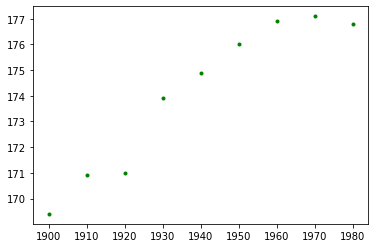

In [8]:
# Height vs Year
heights = data['Height(cm)']
years = data.index
plt.plot(years, heights, 'g.')

**How would you describe the trend?**
1. Is there a trend? Yes.
2. Is the trend upward or downward? Upward but then it slightly goes downwards when it reaches 1980.
3. Is the trend consistent? For the most part, we observe a near linear trend for the height growth.

In [9]:
# Rate of change 
rates_height_change = []
for year in data.index:
    if year == 1900:
        continue
    else:
        prev_year = year - 10
        diff_heights = data.loc[year, 'Height(cm)'] - \
                       data.loc[prev_year, 'Height(cm)']
        rate = diff_heights / 10
        rates_height_change.append(rate)
print(rates_height_change)

[0.15, 0.009999999999999431, 0.2900000000000006, 0.1, 0.10999999999999943, 0.09000000000000057, 0.019999999999998862, -0.029999999999998295]


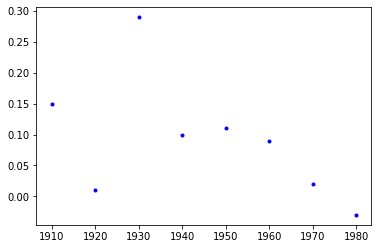

In [10]:
plt.plot(years[1:], rates_height_change, 'b.')

### Modeling

In [11]:
m = np.mean(rates_height_change)
b = data.loc[1900, 'Height(cm)'] - m * 1900
print(m, b)

0.09250000000000008 -6.350000000000136


<b>Plot the model: <br></b>
Y = mx + b <br>
height = m * year + b <br>
height = 0.0925 * year - 6.35

In [12]:
x_coordinates = np.linspace(1900, 1999, 100)
print(x_coordinates)
print(len(x_coordinates))

[1900. 1901. 1902. 1903. 1904. 1905. 1906. 1907. 1908. 1909. 1910. 1911.
 1912. 1913. 1914. 1915. 1916. 1917. 1918. 1919. 1920. 1921. 1922. 1923.
 1924. 1925. 1926. 1927. 1928. 1929. 1930. 1931. 1932. 1933. 1934. 1935.
 1936. 1937. 1938. 1939. 1940. 1941. 1942. 1943. 1944. 1945. 1946. 1947.
 1948. 1949. 1950. 1951. 1952. 1953. 1954. 1955. 1956. 1957. 1958. 1959.
 1960. 1961. 1962. 1963. 1964. 1965. 1966. 1967. 1968. 1969. 1970. 1971.
 1972. 1973. 1974. 1975. 1976. 1977. 1978. 1979. 1980. 1981. 1982. 1983.
 1984. 1985. 1986. 1987. 1988. 1989. 1990. 1991. 1992. 1993. 1994. 1995.
 1996. 1997. 1998. 1999.]
100


In [13]:
y_coordinates = m * x_coordinates + b
print(y_coordinates)
print(len(y_coordinates))

[169.4    169.4925 169.585  169.6775 169.77   169.8625 169.955  170.0475
 170.14   170.2325 170.325  170.4175 170.51   170.6025 170.695  170.7875
 170.88   170.9725 171.065  171.1575 171.25   171.3425 171.435  171.5275
 171.62   171.7125 171.805  171.8975 171.99   172.0825 172.175  172.2675
 172.36   172.4525 172.545  172.6375 172.73   172.8225 172.915  173.0075
 173.1    173.1925 173.285  173.3775 173.47   173.5625 173.655  173.7475
 173.84   173.9325 174.025  174.1175 174.21   174.3025 174.395  174.4875
 174.58   174.6725 174.765  174.8575 174.95   175.0425 175.135  175.2275
 175.32   175.4125 175.505  175.5975 175.69   175.7825 175.875  175.9675
 176.06   176.1525 176.245  176.3375 176.43   176.5225 176.615  176.7075
 176.8    176.8925 176.985  177.0775 177.17   177.2625 177.355  177.4475
 177.54   177.6325 177.725  177.8175 177.91   178.0025 178.095  178.1875
 178.28   178.3725 178.465  178.5575]
100


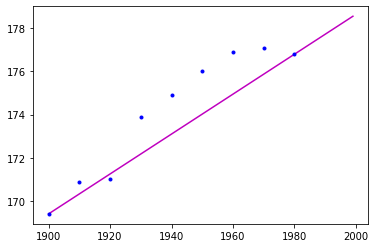

In [14]:
plt.plot(x_coordinates, y_coordinates, 'm-')
plt.plot(years, heights, 'b.')

### Model Evaluation

In [15]:
# Example: Calculate the error for 1970
prediction = m * 1970 + b
print(prediction)
actual = data.loc[1970, "Height(cm)"] # actual = actual height
print(actual)
error = actual - prediction
print(error)

175.87500000000003
177.1
1.224999999999966


In [16]:
# Caculate error for each year
all_errors = []
for year in data.index:
    prediction = m * year + b
    actual = data.loc[year, "Height(cm)"]
    error = actual - prediction
    all_errors.append(error)
print(all_errors)
print(len(all_errors))

[0.0, 0.5749999999999886, -0.2500000000000284, 1.7249999999999943, 1.799999999999983, 1.974999999999966, 1.9499999999999886, 1.224999999999966, -2.842170943040401e-14]
9


In [17]:
# Convert a list to a numpy array
all_errors = np.array(all_errors)
squared_error = all_errors ** 2
print(squared_error)

[0.00000000e+00 3.30625000e-01 6.25000000e-02 2.97562500e+00
 3.24000000e+00 3.90062500e+00 3.80250000e+00 1.50062500e+00
 8.07793567e-28]


### Mean Square Error

In [18]:
# MSE
mse = np.mean(squared_error)
print(mse)

1.7569444444444062


### Predictions

In [19]:
# Predictions for 1890
prediction_1890 = m * 1890 + b
print(prediction_1890)

168.47500000000002


In [20]:
filter1 = (raw_data['Entity'] == "United Kingdom")
filter2 = (raw_data['Year'] == 1890)
raw_data[filter1 & filter2]

,Entity,Code,Year,Unnamed: 3
1184,United Kingdom,GBR,1890,167.4


In [21]:
# Predictions for 2050
prediction_2050 = m * 2120 + b
print(prediction_2050)

189.75000000000003
